In [1]:
import numpy as np
import pandas as pd
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn import preprocessing

# import 'is_string_dtype' and 'is_numeric_dtype' to check the data type 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'SciPy' is used to perform scientific computations
from scipy.stats import shapiro
from scipy import stats

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [2]:
# read csv file using pandas
bill_amount = pd.read_csv('bill_amount.csv')

# display the top 5 rows of the dataframe
bill_amount.head()

,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816


In [3]:
# 'shape' function gives the total number of rows and columns in the data
bill_amount.shape

(13600, 2)

In [4]:
# read csv file using pandas
bill_id = pd.read_csv('bill_id.csv')

# display the top 5 rows of the dataframe
bill_id.head()

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [5]:
# 'shape' function gives the total number of rows and columns in the data
bill_id.shape

(13600, 3)

In [6]:
# read csv file using pandas
clinical = pd.read_csv('clinical_data.csv')

# display the top 5 rows of the dataframe
clinical.head()

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [7]:
# 'shape' function gives the total number of rows and columns in the data
clinical.shape

(3400, 26)

In [8]:
# read csv file using pandas
demo = pd.read_csv('demographics.csv')

# display the top 5 rows of the dataframe
demo.head()

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [9]:
# 'shape' function gives the total number of rows and columns in the data
demo.shape

(3000, 5)

In [10]:
# 'merge' function will join two dataframe on a column
frame = pd.merge(bill_id, demo, on = ['patient_id'])

In [11]:
# display the top 5 rows of the dataframe
frame.head()

,bill_id,patient_id,date_of_admission,gender,race,resident_status,date_of_birth
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19
1,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19
2,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19
3,1692196063,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19
4,6466235037,1d21f2be18683991eb93d182d6b2d220,2015-09-17,Male,Indian,Singaporean,1976-12-19


In [12]:
# 'shape' function gives the total number of rows and columns in the data
frame.shape

(13600, 7)

In [13]:
# 'rename' function will rename the column with the help of dictionary
clinical = clinical.rename(columns={'id': 'patient_id'})

In [14]:
# 'merge' function will join two dataframe on a column
frame1 = pd.merge(frame, clinical, on = ['patient_id', 'date_of_admission'])

In [15]:
# display the top 5 rows of the dataframe
frame1.head()

,bill_id,patient_id,date_of_admission,gender,race,resident_status,date_of_birth,date_of_discharge,medical_history_1,medical_history_2,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
2,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
3,1692196063,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
4,6466235037,1d21f2be18683991eb93d182d6b2d220,2015-09-17,Male,Indian,Singaporean,1976-12-19,2015-09-30,0,0.0,...,0,1,0,1,1,16.4,23.7,108.0,72.3,161.0


In [16]:
# 'merge' function will join two dataframe on a column
df = pd.merge(frame1, bill_amount, on=['bill_id'])

In [17]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [18]:
# display the top 5 rows of the dataframe
df.head()

,bill_id,patient_id,date_of_admission,gender,race,resident_status,date_of_birth,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,amount
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,951.214467
1,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,12338.269972
2,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,1133.601902
3,1692196063,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Male,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,982.332324
4,6466235037,1d21f2be18683991eb93d182d6b2d220,2015-09-17,Male,Indian,Singaporean,1976-12-19,2015-09-30,0,0.0,0,0,0.0,0,1,1,1,1,0,1,0,0,1,0,1,1,16.4,23.7,108.0,72.3,161.0,1498.125668


In [19]:
# dropping duplicates value
df = df.drop_duplicates()

# Data Understanding

In [20]:
# 'shape' function gives the total number of rows and columns in the data
df.shape

(13600, 32)

In [21]:
# creating a dataframe 
# adding datatypes, nunique values and null values as column in it
# then can compare them all and can understand the data
understand = pd.concat([df.dtypes, df.nunique(), df.isnull().sum()], axis=1)
understand.columns = ['Data type', 'Unique values', 'Null Values']

# fetching the dataframe
understand

,Data type,Unique values,Null Values
bill_id,int64,13600,0
patient_id,object,3000,0
date_of_admission,object,1450,0
gender,object,4,0
race,object,6,0
resident_status,object,4,0
date_of_birth,object,2746,0
date_of_discharge,object,1532,0
medical_history_1,int64,2,0
medical_history_2,float64,2,932


In [22]:
# 'info' function will give us information about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bill_id             13600 non-null  int64  
 1   patient_id          13600 non-null  object 
 2   date_of_admission   13600 non-null  object 
 3   gender              13600 non-null  object 
 4   race                13600 non-null  object 
 5   resident_status     13600 non-null  object 
 6   date_of_birth       13600 non-null  object 
 7   date_of_discharge   13600 non-null  object 
 8   medical_history_1   13600 non-null  int64  
 9   medical_history_2   12668 non-null  float64
 10  medical_history_3   13600 non-null  object 
 11  medical_history_4   13600 non-null  int64  
 12  medical_history_5   12384 non-null  float64
 13  medical_history_6   13600 non-null  int64  
 14  medical_history_7   13600 non-null  int64  
 15  preop_medication_1  13600 non-null  int64  
 16  preo

# EDA

In [23]:
# use drop() to drop the redundant variables and repeated features
# 'axis = 1' drops the corresponding columns
df = df.drop('bill_id', axis= 1)

# re-check the shape of the dataframe
df.shape

(13600, 31)

In [24]:
for i in df.columns:
    print(i.upper())
    print(df[i].unique(),'\n\n\n')

PATIENT_ID
['1d21f2be18683991eb93d182d6b2d220' '62bdca0b95d97e99e1c712048fb9fd09'
 'e0397dd72caf4552c5babebd3d61736c' ... 'ac52a32f8ce8c46d82df2d72052ae5a9'
 '4f67a54ab205cc9e7e2b0a4ee08e4fba' 'a4c61deaa9ce86b4d2289eab6128b872'] 



DATE_OF_ADMISSION
['2011-01-01' '2015-09-17' '2011-01-02' ... '2015-12-21' '2015-12-24'
 '2015-12-28'] 



GENDER
['Male' 'Female' 'm' 'f'] 



RACE
['Indian' 'Malay' 'Chinese' 'India' 'Others' 'chinese'] 



RESIDENT_STATUS
['Singaporean' 'PR' 'Singapore citizen' 'Foreigner'] 



DATE_OF_BIRTH
['1976-12-19' '1978-07-20' '1967-12-06' ... '1960-05-10' '1979-03-06'
 '1976-10-19'] 



DATE_OF_DISCHARGE
['2011-01-11' '2015-09-30' '2011-01-14' ... '2016-01-09' '2016-01-08'
 '2016-01-11'] 



MEDICAL_HISTORY_1
[0 1] 



MEDICAL_HISTORY_2
[ 1.  0. nan] 



MEDICAL_HISTORY_3
['0' 'No' '1' 'Yes'] 



MEDICAL_HISTORY_4
[0 1] 



MEDICAL_HISTORY_5
[ 0. nan  1.] 



MEDICAL_HISTORY_6
[0 1] 



MEDICAL_HISTORY_7
[0 1] 



PREOP_MEDICATION_1
[1 0] 



PREOP_MEDICATION_2


In [25]:
df['gender'] = df['gender'].apply([lambda x : 'Male' if x=='m' else 'Female'])

In [26]:
df['medical_history_3'] = df['medical_history_3'].apply([lambda x : 0 if x=='No' else 1])
df['medical_history_3'] = df['medical_history_3'].astype(int)

In [27]:
df['medical_history_2'] = df['medical_history_2'].fillna(method='ffill')

In [28]:
df['medical_history_5'] = df['medical_history_5'].fillna(method='ffill')

In [29]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

In [30]:
# extract various date time components as seperate variables
df = df.assign(birth_year = df.date_of_birth.dt.year)

In [31]:
df['age'] = 2020 - df['birth_year']

df['age'].head()

0    44
1    44
2    44
3    44
4    44
Name: age, dtype: int64

In [32]:
df.head()

,patient_id,date_of_admission,gender,race,resident_status,date_of_birth,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,amount,birth_year,age
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Female,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,1,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,951.214467,1976,44
1,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Female,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,1,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,12338.269972,1976,44
2,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Female,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,1,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,1133.601902,1976,44
3,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Female,Indian,Singaporean,1976-12-19,2011-01-11,0,1.0,1,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,982.332324,1976,44
4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,Female,Indian,Singaporean,1976-12-19,2015-09-30,0,0.0,1,0,0.0,0,1,1,1,1,0,1,0,0,1,0,1,1,16.4,23.7,108.0,72.3,161.0,1498.125668,1976,44


In [33]:
df.drop('date_of_birth', axis = 1, inplace = True)

In [34]:
df['medical_history'] = df['medical_history_1'] + df['medical_history_2'] + df['medical_history_3'] + df['medical_history_4'] +\
                        df['medical_history_5'] + df['medical_history_6'] + df['medical_history_7']
df['medical_history'].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: medical_history, dtype: float64

In [35]:
df['medical_history'].value_counts()

2.0    4972
1.0    4316
3.0    2660
0.0     832
4.0     748
5.0      72
Name: medical_history, dtype: int64

In [36]:
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])


df['date_of_discharge'].head()

0    2011-01-11
1    2011-01-11
2    2011-01-11
3    2011-01-11
4    2015-09-30
Name: date_of_discharge, dtype: object

In [37]:
df['date_of_discharge'] = pd.to_datetime(df['date_of_discharge'])
df['date_of_discharge'].head()

0   2011-01-11
1   2011-01-11
2   2011-01-11
3   2011-01-11
4   2015-09-30
Name: date_of_discharge, dtype: datetime64[ns]

In [38]:
df['number_of_days'] = df['date_of_discharge'] - df['date_of_admission']


In [39]:
df['number_of_days'] = df['number_of_days'].apply(lambda x : str(x).split(' ')[0])
df['number_of_days'] = df['number_of_days'].astype('int64')

In [40]:
df['number_of_days'].dtype

dtype('int64')

In [41]:
df['preop_medication'] = df['preop_medication_1'] + df['preop_medication_2'] + df['preop_medication_3'] + df['preop_medication_4'] +\
                        df['preop_medication_5'] + df['preop_medication_6']

df['preop_medication'].head()

0    3
1    3
2    3
3    3
4    4
Name: preop_medication, dtype: int64

In [42]:
df['symptoms'] = df['symptom_1'] + df['symptom_2'] + df['symptom_3'] + df['symptom_4'] + df['symptom_5']

df['symptoms'].head()

0    2
1    2
2    2
3    2
4    3
Name: symptoms, dtype: int64

In [43]:
df['height_in_mtr_sq'] = df['height'].apply(lambda x : (x/100)**2)

In [44]:
df['body_mass_index_(BMI)'] = df['weight'] / df['height_in_mtr_sq']

In [45]:
df.head()

,patient_id,date_of_admission,gender,race,resident_status,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,amount,birth_year,age,medical_history,number_of_days,preop_medication,symptoms,height_in_mtr_sq,body_mass_index_(BMI)
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Female,Indian,Singaporean,2011-01-11,0,1.0,1,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,951.214467,1976,44,2.0,10,3,2,2.5921,27.506655
1,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Female,Indian,Singaporean,2011-01-11,0,1.0,1,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,12338.269972,1976,44,2.0,10,3,2,2.5921,27.506655
2,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Female,Indian,Singaporean,2011-01-11,0,1.0,1,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,1133.601902,1976,44,2.0,10,3,2,2.5921,27.506655
3,1d21f2be18683991eb93d182d6b2d220,2011-01-01,Female,Indian,Singaporean,2011-01-11,0,1.0,1,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,982.332324,1976,44,2.0,10,3,2,2.5921,27.506655
4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,Female,Indian,Singaporean,2015-09-30,0,0.0,1,0,0.0,0,1,1,1,1,0,1,0,0,1,0,1,1,16.4,23.7,108.0,72.3,161.0,1498.125668,1976,44,2.0,13,4,3,2.5921,27.892442


In [46]:
df.columns

Index(['patient_id', 'date_of_admission', 'gender', 'race', 'resident_status',
       'date_of_discharge', 'medical_history_1', 'medical_history_2',
       'medical_history_3', 'medical_history_4', 'medical_history_5',
       'medical_history_6', 'medical_history_7', 'preop_medication_1',
       'preop_medication_2', 'preop_medication_3', 'preop_medication_4',
       'preop_medication_5', 'preop_medication_6', 'symptom_1', 'symptom_2',
       'symptom_3', 'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'amount', 'birth_year', 'age',
       'medical_history', 'number_of_days', 'preop_medication', 'symptoms',
       'height_in_mtr_sq', 'body_mass_index_(BMI)'],
      dtype='object')

### Deleting insignificant features after feature engineering

In [47]:
# deleting insignificant feature after feature engineering
df.drop(['date_of_admission', 'date_of_discharge', 'medical_history_1', 'medical_history_2',
       'medical_history_3', 'medical_history_4', 'medical_history_5',
       'medical_history_6', 'medical_history_7', 'preop_medication_1',
       'preop_medication_2', 'preop_medication_3', 'preop_medication_4',
       'preop_medication_5', 'preop_medication_6', 'symptom_1', 'symptom_2',
       'symptom_3', 'symptom_4', 'symptom_5', 'weight', 'height', 'birth_year',
        'height_in_mtr_sq'], axis = 1, inplace = True)

In [48]:
df.head()

,patient_id,gender,race,resident_status,lab_result_1,lab_result_2,lab_result_3,amount,age,medical_history,number_of_days,preop_medication,symptoms,body_mass_index_(BMI)
0,1d21f2be18683991eb93d182d6b2d220,Female,Indian,Singaporean,13.2,30.9,123.0,951.214467,44,2.0,10,3,2,27.506655
1,1d21f2be18683991eb93d182d6b2d220,Female,Indian,Singaporean,13.2,30.9,123.0,12338.269972,44,2.0,10,3,2,27.506655
2,1d21f2be18683991eb93d182d6b2d220,Female,Indian,Singaporean,13.2,30.9,123.0,1133.601902,44,2.0,10,3,2,27.506655
3,1d21f2be18683991eb93d182d6b2d220,Female,Indian,Singaporean,13.2,30.9,123.0,982.332324,44,2.0,10,3,2,27.506655
4,1d21f2be18683991eb93d182d6b2d220,Female,Indian,Singaporean,16.4,23.7,108.0,1498.125668,44,2.0,13,4,3,27.892442


In [49]:
df.columns

Index(['patient_id', 'gender', 'race', 'resident_status', 'lab_result_1',
       'lab_result_2', 'lab_result_3', 'amount', 'age', 'medical_history',
       'number_of_days', 'preop_medication', 'symptoms',
       'body_mass_index_(BMI)'],
      dtype='object')

In [50]:
df.shape

(13600, 14)

In [51]:
df1 = pd.DataFrame(df.groupby(['patient_id', 'gender', 'race', 'resident_status', 'lab_result_1', 'lab_result_2',
                               'lab_result_3','medical_history', 'age', 'preop_medication', 'symptoms',
                               'body_mass_index_(BMI)']).agg({"amount":np.sum, "number_of_days": np.sum}))

In [52]:
df1.reset_index(inplace = True)
df1.head()

,patient_id,gender,race,resident_status,lab_result_1,lab_result_2,lab_result_3,medical_history,age,preop_medication,symptoms,body_mass_index_(BMI),amount,number_of_days
0,00225710a878eff524a1d13be817e8e2,Female,Chinese,Singaporean,13.4,27.9,96.0,2.0,37,1,1,27.845994,5190.566695,48
1,0029d90eb654699c18001c17efb0f129,Female,Chinese,Singaporean,16.7,26.5,109.0,3.0,77,1,2,34.804687,22601.497872,52
2,0040333abd68527ecb53e1db9073f52e,Female,India,Singaporean,14.8,25.2,96.0,3.0,48,3,2,26.872634,17447.181635,48
3,00473b58e3dc8ae37b3cb34069705083,Female,Chinese,Singapore citizen,14.9,28.7,122.0,2.0,44,3,3,31.679687,15285.883220,20
4,0078662d1d983dde68ea057c42d5b5cf,Female,Malay,Foreigner,14.2,27.2,89.0,2.0,78,4,3,24.959070,73477.869010,48


In [53]:
df1.shape

(3400, 14)

In [54]:
df_num = df1.select_dtypes(np.number)
df_num.columns

Index(['lab_result_1', 'lab_result_2', 'lab_result_3', 'medical_history',
       'age', 'preop_medication', 'symptoms', 'body_mass_index_(BMI)',
       'amount', 'number_of_days'],
      dtype='object')

In [55]:
df_cat = df1.select_dtypes('object')
df_cat.columns

Index(['patient_id', 'gender', 'race', 'resident_status'], dtype='object')

# Visualization

# univariate

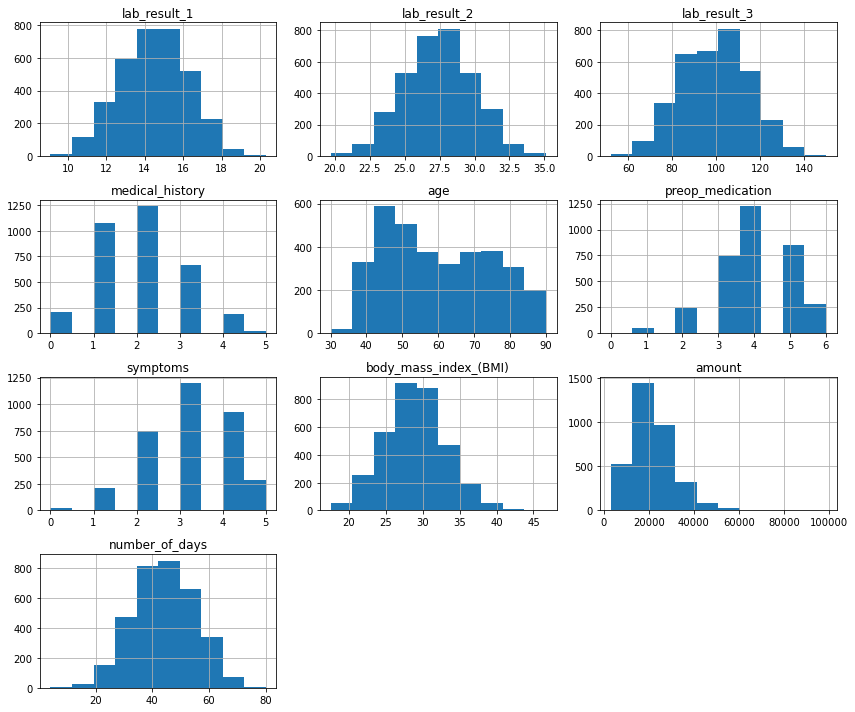

In [56]:
df_num.hist(figsize = (12,10))

plt.tight_layout()

plt.show()

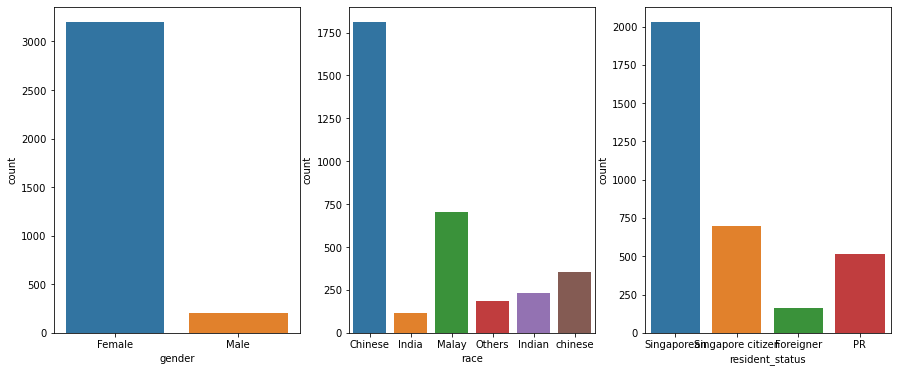

In [57]:
categorical = ['gender', 'race', 'resident_status']

fig, ax = plt.subplots(1, 3, figsize = (15, 6))

for i, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_cat[i], ax = subplot)
plt.show()

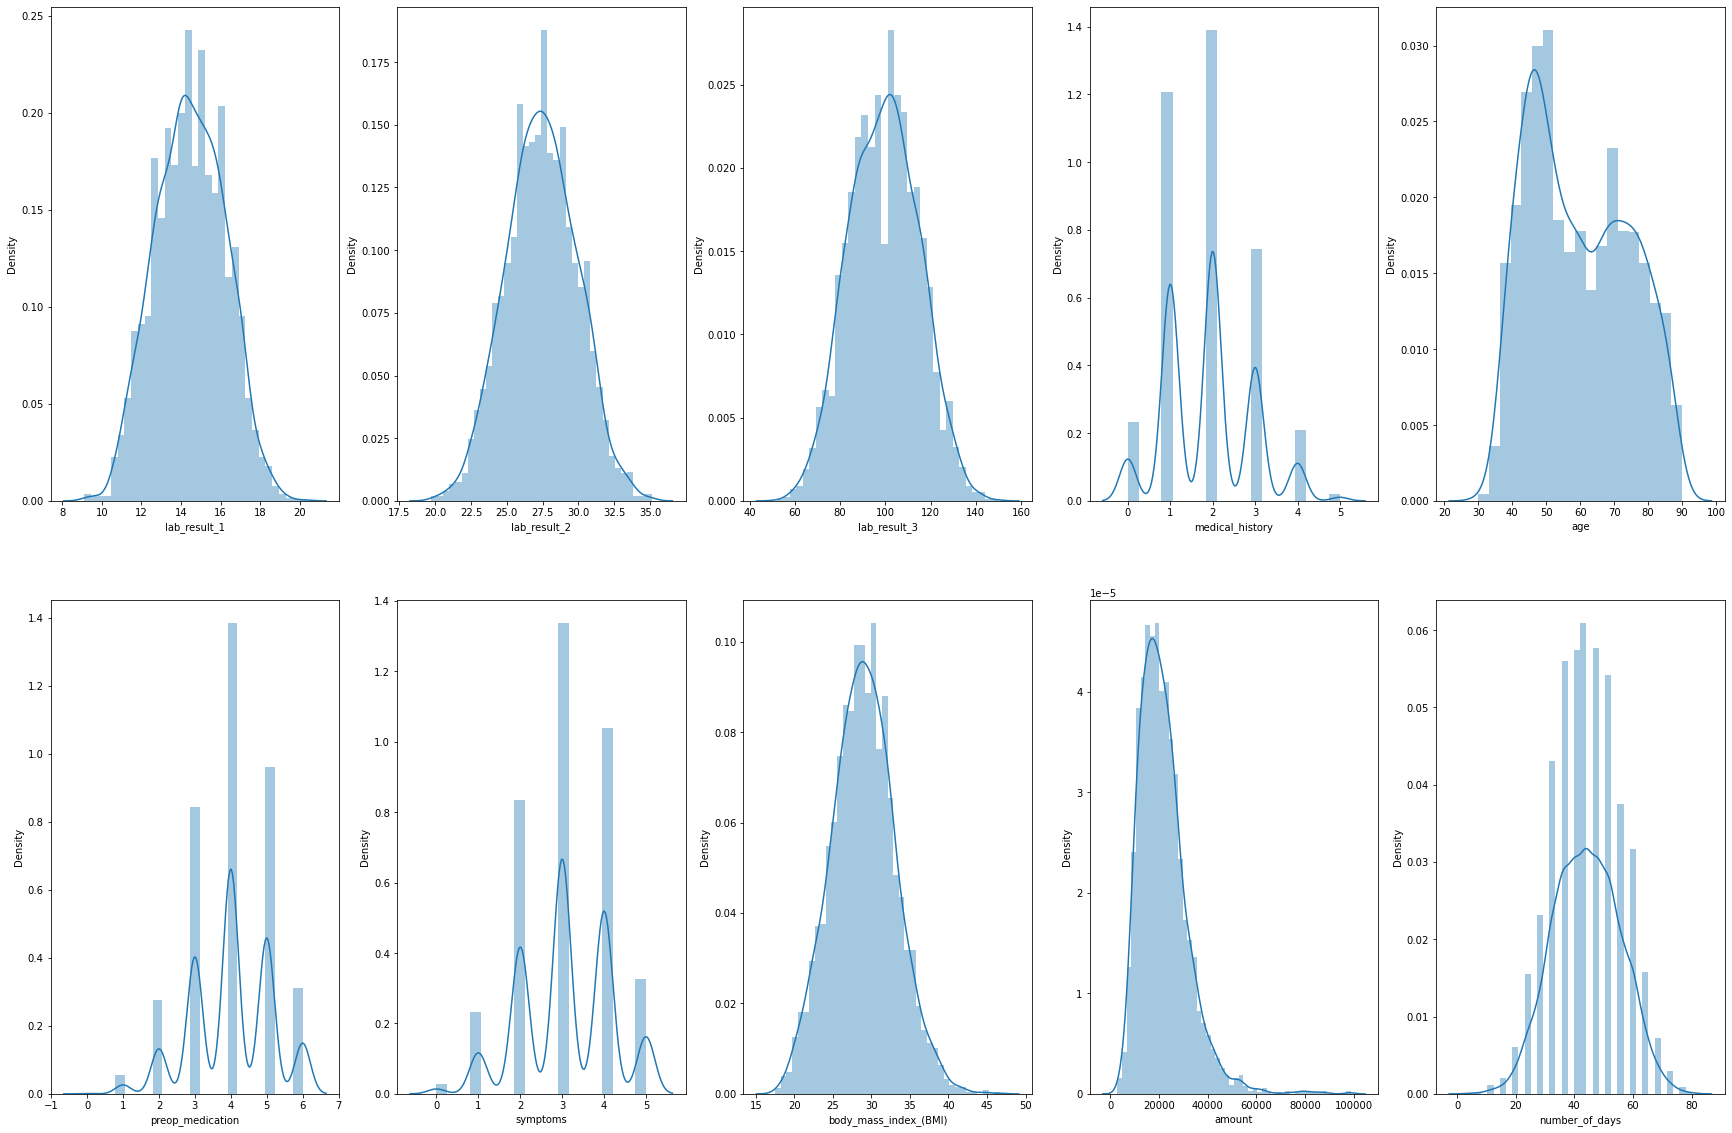

In [58]:
numerical = df_num.columns

fig, ax = plt.subplots(2, 5, figsize = (30, 20))

for i, subplot in zip(list(numerical), ax.flatten()):
    sns.distplot(df_num[i], ax = subplot)
plt.show()

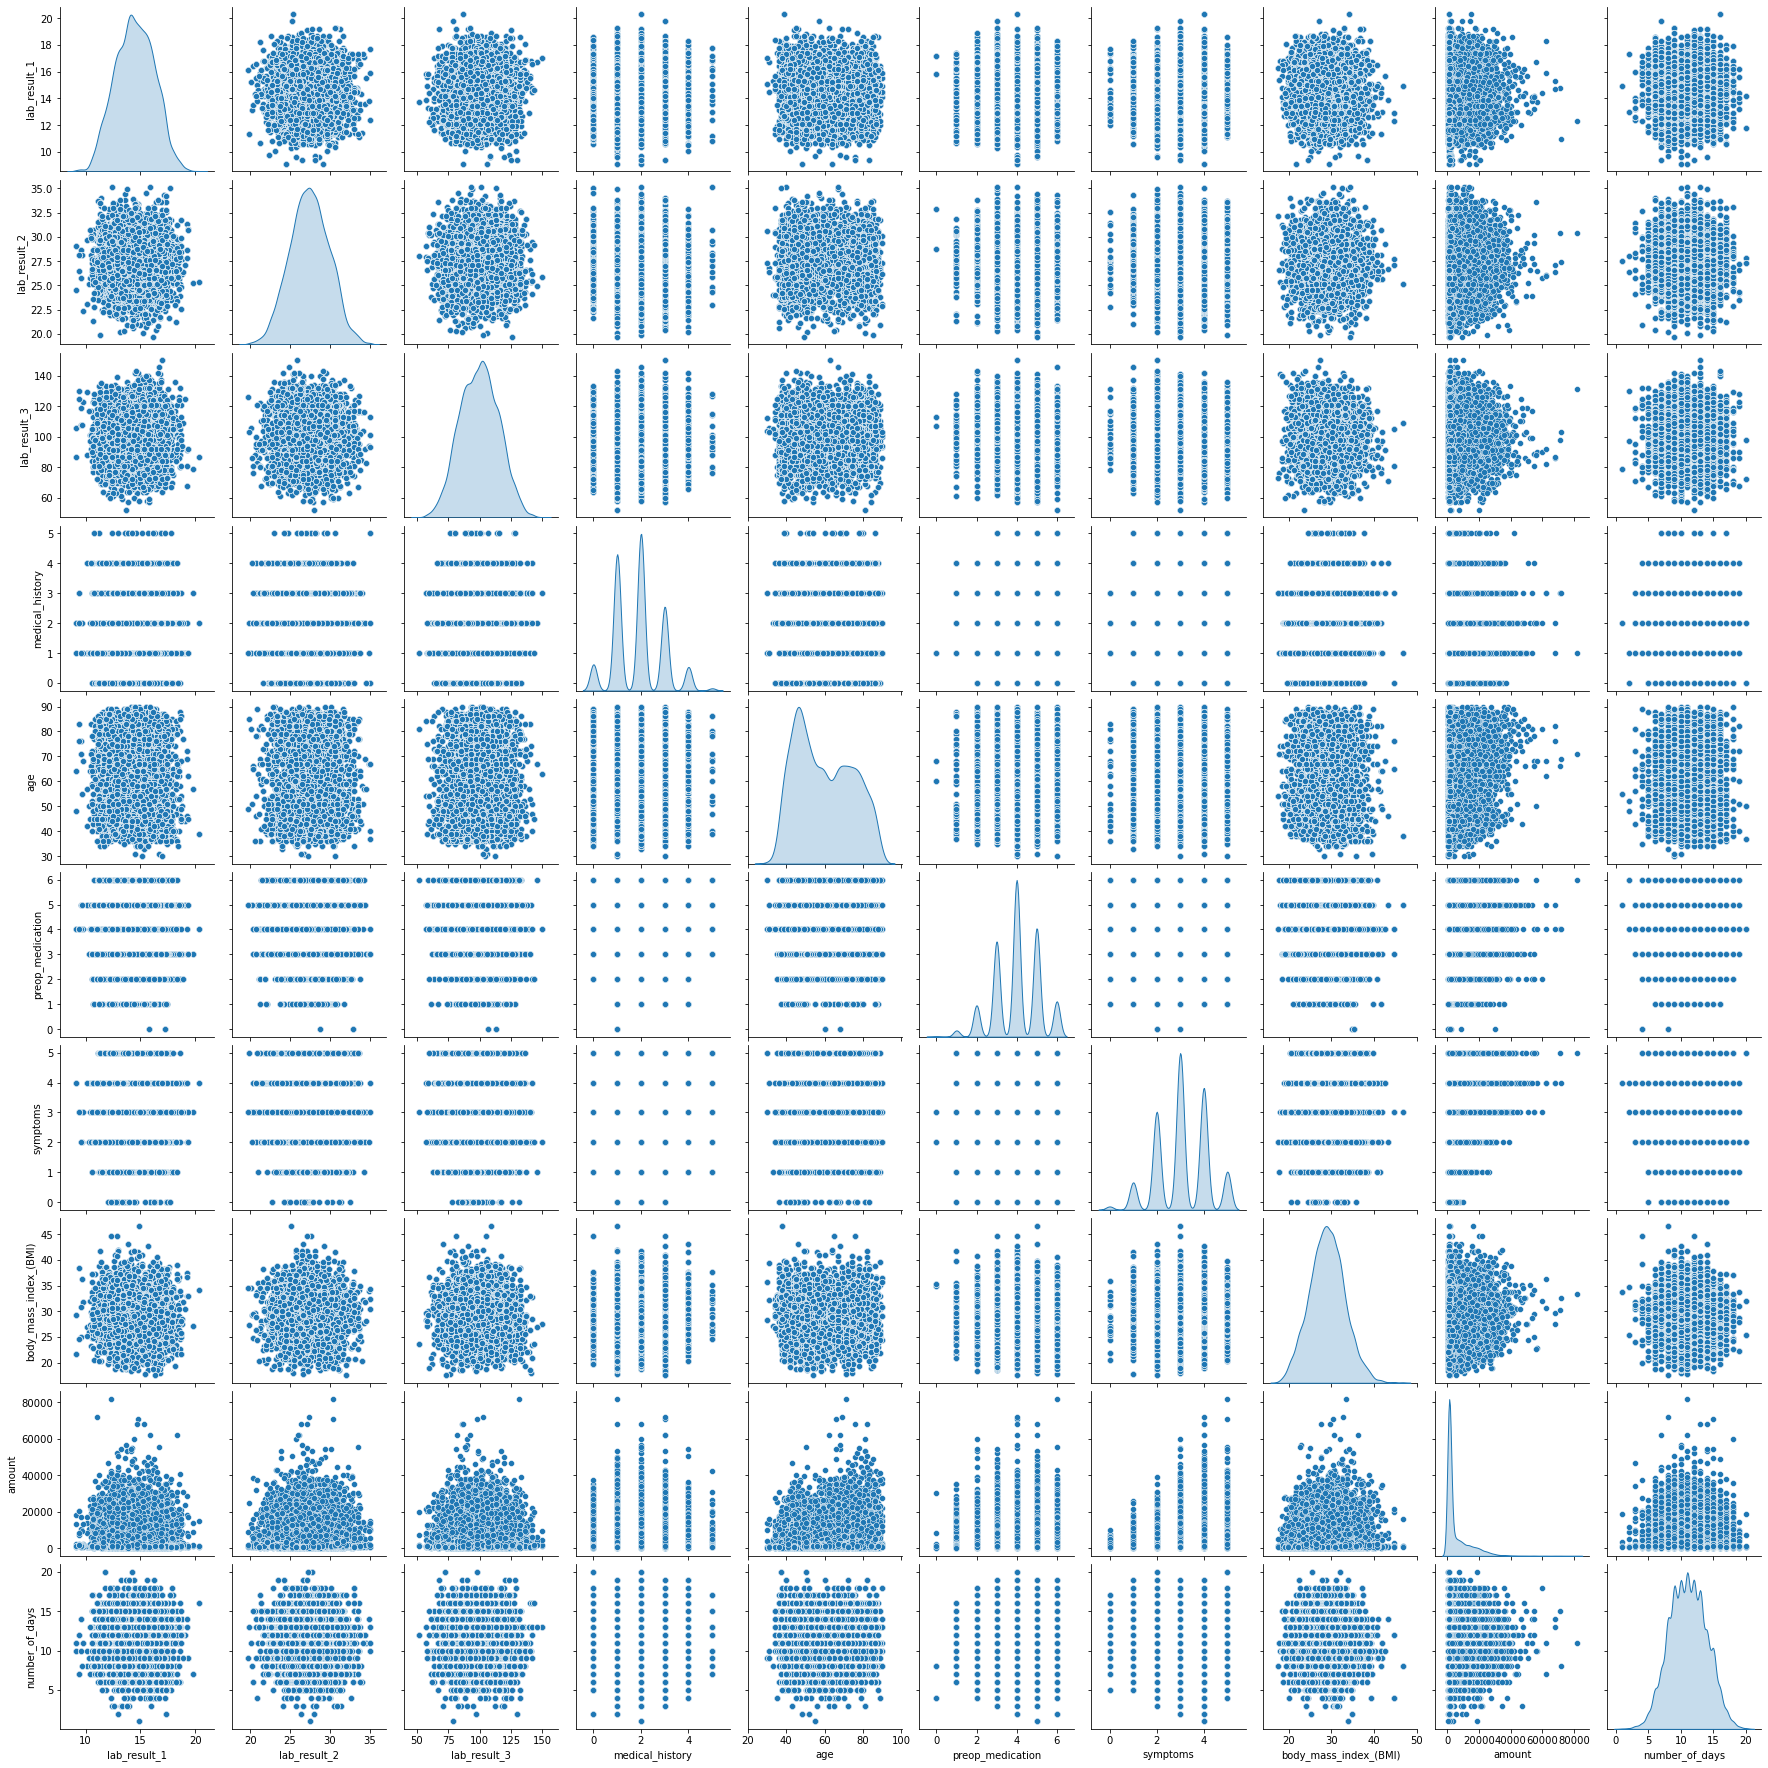

In [59]:
column = df[df_num.columns]

sns.pairplot(column, kind = 'scatter', diag_kind='kde')
plt.show()

# Bivariate

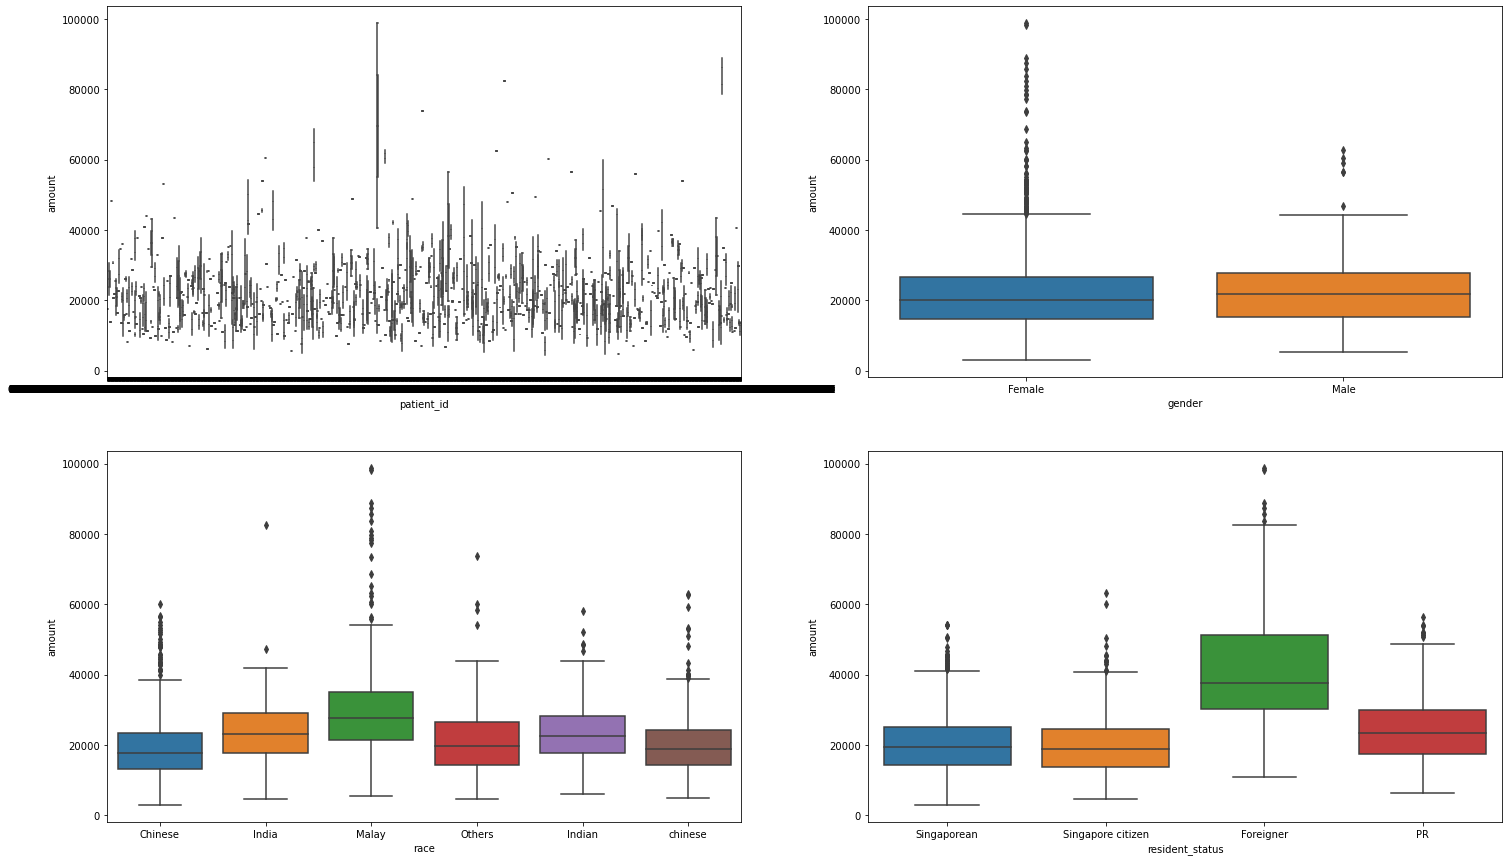

In [60]:
categorical = df_cat.columns

fig, ax = plt.subplots(2, 2, figsize = (25, 15))

for i, subplot in zip(list(categorical), ax.flatten()):
    sns.boxplot(x = df_cat[i], y = df1['amount'], ax = subplot)
plt.show()

# Analysing Target Variable

<AxesSubplot:>

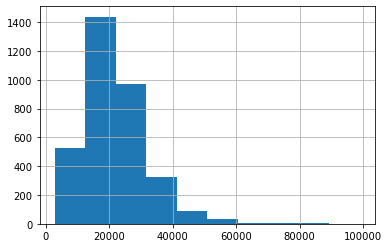

In [61]:
df1['amount'].hist()

In [62]:
df1['amount'].skew()

1.6972795480842022

<AxesSubplot:xlabel='amount', ylabel='Density'>

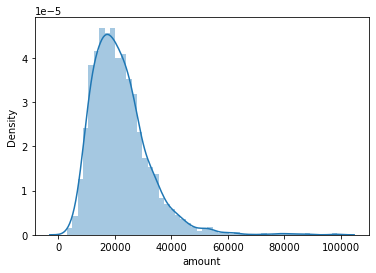

In [63]:
sns.distplot(df1['amount'])

In [64]:
df1['log_amount'] = np.log(df1['amount'])

<AxesSubplot:>

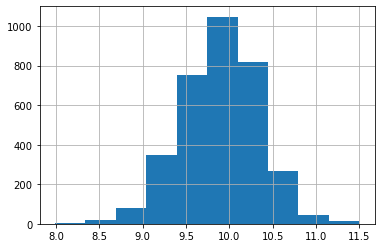

In [65]:
df1['log_amount'].hist()

In [66]:
df1['log_amount'].skew()

-0.14838438985857808

<AxesSubplot:xlabel='log_amount', ylabel='Density'>

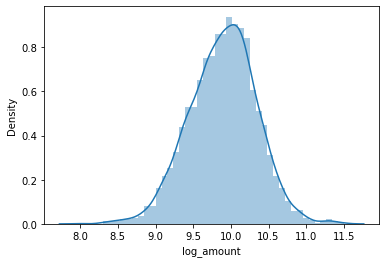

In [67]:
sns.distplot(df1['log_amount'], hist = True)

# outliers

# With IQR

In [68]:
# calculate the first quartile
Q1 = df1.quantile(0.25)

# calculate the third quartile
Q3 = df1.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

lab_result_1                 2.600000
lab_result_2                 3.300000
lab_result_3                22.000000
medical_history              2.000000
age                         25.000000
preop_medication             2.000000
symptoms                     2.000000
body_mass_index_(BMI)        5.557271
amount                   11886.921604
number_of_days              16.000000
log_amount                   0.589746
dtype: float64


In [69]:
# remove the outliers from the dataframe 'df_Heart'
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df1 = df1.reset_index(drop = True)

# Missing Values 

In [70]:
df1.shape

(3232, 15)

In [71]:
df1.isnull().sum()

patient_id               0
gender                   0
race                     0
resident_status          0
lab_result_1             0
lab_result_2             0
lab_result_3             0
medical_history          0
age                      0
preop_medication         0
symptoms                 0
body_mass_index_(BMI)    0
amount                   0
number_of_days           0
log_amount               0
dtype: int64

<AxesSubplot:>

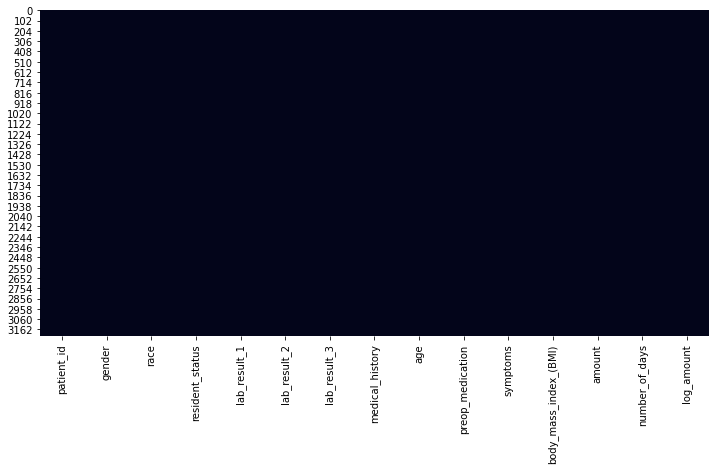

In [72]:
plt.rcParams['figure.figsize'] = (12,6)
sns.heatmap(df1.isnull(), cbar = False)

# Splitting data into categoric and numeric

In [73]:
df_num = df1.select_dtypes(np.number)

df_cat = df1.select_dtypes(include = 'object')
df_cat.columns

Index(['patient_id', 'gender', 'race', 'resident_status'], dtype='object')

In [74]:
df_cat.shape

(3232, 4)

In [75]:
df_num.shape

(3232, 11)

## applying ordinal encoding

In [76]:
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder()
df_cat[df_cat.columns] = ord.fit_transform(df_cat)

In [77]:
df_new = pd.concat([df_cat, df_num], axis = 1)
df_new.head()

,patient_id,gender,race,resident_status,lab_result_1,lab_result_2,lab_result_3,medical_history,age,preop_medication,symptoms,body_mass_index_(BMI),amount,number_of_days,log_amount
0,0.0,0.0,0.0,3.0,16.7,26.5,109.0,3.0,77,1,2,34.804687,22601.497872,52,10.025771
1,1.0,0.0,1.0,3.0,14.8,25.2,96.0,3.0,48,3,2,26.872634,17447.181635,48,9.766933
2,2.0,0.0,0.0,2.0,14.9,28.7,122.0,2.0,44,3,3,31.679687,15285.883220,20,9.634685
3,3.0,0.0,4.0,0.0,13.0,25.8,102.0,1.0,60,4,3,23.867187,26051.592258,40,10.167834
4,4.0,0.0,3.0,3.0,14.3,24.7,123.0,0.0,73,4,3,23.965657,21498.986758,44,9.975761


In [78]:
df_new.shape

(3232, 15)

In [79]:
X = df_new.drop(['amount', 'log_amount'], axis =1)

X_col = X.columns

y = df_new[['amount', 'log_amount']]

In [80]:
X.shape

(3232, 13)

In [81]:
y.shape

(3232, 2)

# Applying  Standardization on Independent Features

In [82]:
# importing a algorithm from sklearn.preprocessing library
from sklearn.preprocessing import StandardScaler

# calling StandardScaler() algorithm
sc = StandardScaler()

# fit_transform will transform X (independent) into standardise values
X = sc.fit_transform(X)

In [83]:
X = pd.DataFrame(X, columns = X_col)
X.head()

,patient_id,gender,race,resident_status,lab_result_1,lab_result_2,lab_result_3,medical_history,age,preop_medication,symptoms,body_mass_index_(BMI),number_of_days
0,-1.741880,-0.252701,-0.831220,0.707083,1.283080,-0.387208,0.614091,1.128656,1.217900,-2.720374,-1.034694,1.473867,0.685049
1,-1.740665,-0.252701,-0.282730,0.707083,0.190728,-0.923836,-0.238462,1.128656,-0.775696,-0.909406,-1.034694,-0.495610,0.332377
2,-1.739450,-0.252701,-0.831220,-0.458883,0.248220,0.520931,1.466645,0.129802,-1.050675,-0.909406,-0.075391,0.697950,-2.136332
3,-1.738236,-0.252701,1.362738,-2.790814,-0.844133,-0.676162,0.155024,-0.869052,0.049240,-0.003922,-0.075391,-1.241842,-0.372969
4,-1.737021,-0.252701,0.814249,0.707083,-0.096734,-1.130232,1.532226,-1.867906,0.942921,-0.003922,-0.075391,-1.217393,-0.020296


In [84]:
X.shape

(3232, 13)

In [85]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (2262, 13)
X_test  (970, 13)
y_train  (2262, 2)
y_test  (970, 2)


In [86]:
col = ['Model', 'Model Name', 'RMSE', 'R-Squared', 'Adj. R-Squared']

result_tabulation = pd.DataFrame(columns=col)

models = [LinearRegression(), KNeighborsRegressor(), XGBRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]

def LinearModel(model_name):
    
    for i in models:
        
        global result_tabulation
            
        mod = i
        mod.fit(X_train, y_train['amount'])
        y_pred = mod.predict(X_test)
        actual = y_test['amount']
    
        N = X_train.shape[0] + y_train.shape[0]
        P = X_train.shape[1]
        R = metrics.r2_score(actual, y_pred)
    
        model_matrix = pd.Series({'Model': str(model_name),
                                  'Model Name': str(i),
                                  'RMSE': np.sqrt(metrics.mean_squared_error(actual, y_pred)),
                                  'R-Squared': R,
                                  'Adj. R-Squared': (1-((1-(R))*(N-1))/(N-P-1))})
    
        result_tabulation = result_tabulation.append(model_matrix, ignore_index=True)
    
    return result_tabulation

In [87]:
LinearModel('Without log')

,Model,Model Name,RMSE,R-Squared,Adj. R-Squared
0,Without log,LinearRegression(),5219.317193,0.591886,0.590710
1,Without log,KNeighborsRegressor(),5634.153245,0.524434,0.523063
2,Without log,"XGBRegressor(base_score=0.5, booster='gbtree',...",4411.768712,0.708405,0.707565
3,Without log,SVR(),8222.015841,-0.012769,-0.015689
4,Without log,DecisionTreeRegressor(),6326.068940,0.400455,0.398727
5,Without log,RandomForestRegressor(),4303.765883,0.722508,0.721708


In [90]:
models = [LinearRegression(), KNeighborsRegressor(), XGBRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]

def LinearModel1(model_name):
    
    for i in models:
        
        global result_tabulation
            
        mod = i
        mod.fit(X_train, y_train['log_amount'])
        y_pred = np.exp(mod.predict(X_test))
        actual = y_test['amount']
    
        N = X_train.shape[0] + y_train.shape[0]
        P = X_train.shape[1]
        R = metrics.r2_score(actual, y_pred)
    
        model_matrix = pd.Series({'Model': str(model_name),
                                  'Model Name': str(i),
                                  'RMSE': np.sqrt(metrics.mean_squared_error(actual,y_pred)),
                                  'R-Squared': R,
                                  'Adj. R-Squared': (1-((1-(R))*(N-1))/(N-P-1))})
    
        result_tabulation = result_tabulation.append(model_matrix, ignore_index=True)
    
    return result_tabulation

In [91]:
LinearModel1('With Log')

,Model,Model Name,RMSE,R-Squared,Adj. R-Squared
0,Without log,LinearRegression(),5219.317193,0.591886,0.590710
1,Without log,KNeighborsRegressor(),5634.153245,0.524434,0.523063
2,Without log,"XGBRegressor(base_score=0.5, booster='gbtree',...",4411.768712,0.708405,0.707565
3,Without log,SVR(),8222.015841,-0.012769,-0.015689
4,Without log,DecisionTreeRegressor(),6326.068940,0.400455,0.398727
5,Without log,RandomForestRegressor(),4303.765883,0.722508,0.721708
6,With Log,LinearRegression(),5393.151416,0.564248,0.562992
7,With Log,KNeighborsRegressor(),5743.464593,0.505801,0.504377
8,With Log,"XGBRegressor(base_score=0.5, booster='gbtree',...",4376.758920,0.713015,0.712188
9,With Log,SVR(),4582.834985,0.685354,0.684447
